<a href="https://colab.research.google.com/github/afk-Parth/MNIST-1-9-Digit-Classifier-Dense-only-/blob/main/Digit-Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_mask = y_train != 0
test_mask  = y_test  != 0
x_train, y_train = x_train[train_mask], y_train[train_mask] - 1   # classes 0‑8 now
x_test,  y_test  = x_test [test_mask],  y_test [test_mask]  - 1


In [4]:
num_classes = 9
input_dim   = 28*28

In [5]:
x_train = x_train.reshape(-1, input_dim).astype("float32") / 255.0
x_test  = x_test.reshape (-1, input_dim).astype("float32") / 255.0


In [6]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,017 (918.04 KB)

 Trainable params: 235,017 (918.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.1)


Epoch 1/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7821 - loss: 0.6886 - val_accuracy: 0.9660 - val_loss: 0.1223
Epoch 2/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9399 - loss: 0.1986 - val_accuracy: 0.9743 - val_loss: 0.0884
Epoch 3/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9595 - loss: 0.1361 - val_accuracy: 0.9767 - val_loss: 0.0777
Epoch 4/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9669 - loss: 0.1102 - val_accuracy: 0.9789 - val_loss: 0.0715
Epoch 5/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9706 - loss: 0.0933 - val_accuracy: 0.9793 - val_loss: 0.0690
Epoch 6/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9762 - loss: 0.0753 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 7/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9787 - loss: 0.0701 - val_accuracy: 0.9800 - val_loss: 0.0663
Epoch 8/12
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9803 - loss: 0.0621 - val_accuracy:

In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification report:\n",
      classification_report(y_test, y_pred, digits=4))


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification report:
               precision    recall  f1-score   support

           0     0.9904    0.9947    0.9925      1135
           1     0.9855    0.9855    0.9855      1032
           2     0.9737    0.9881    0.9808      1010
           3     0.9887    0.9786    0.9836       982
           4     0.9820    0.9765    0.9792       892
           5     0.9744    0.9916    0.9829       958
           6     0.9882    0.9737    0.9809      1028
           7     0.9865    0.9733    0.9798       974
           8     0.9754    0.9812    0.9783      1009

    accuracy                         0.9828      9020
   macro avg     0.9827    0.9826    0.9826      9020
weighted avg     0.9829    0.9828    0.9828      9020



In [10]:
def plot_samples(idx_list, title, cols=5):
    plt.figure(figsize=(cols*2, 2*(len(idx_list)//cols+1)))
    for i, idx in enumerate(idx_list):
        img = x_test[idx].reshape(28,28)
        true, pred = y_test[idx]+1, y_pred[idx]+1  # add 1 to restore original label
        plt.subplot(len(idx_list)//cols+1, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"T:{true}  P:{pred}", fontsize=8,
                  color='green' if true==pred else 'red')
        plt.axis('off')
    plt.suptitle(title); plt.tight_layout(); plt.show()


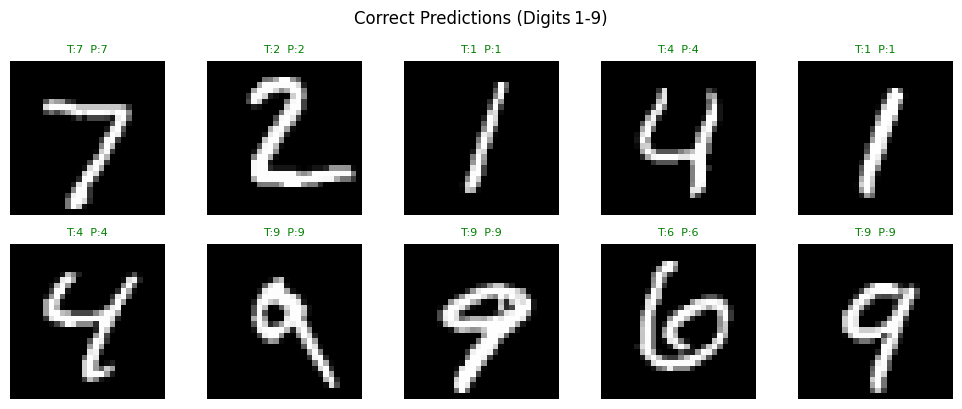

In [11]:
correct_idx = np.where(y_pred == y_test)[0][:10]
plot_samples(correct_idx, "Correct Predictions (Digits 1‑9)")


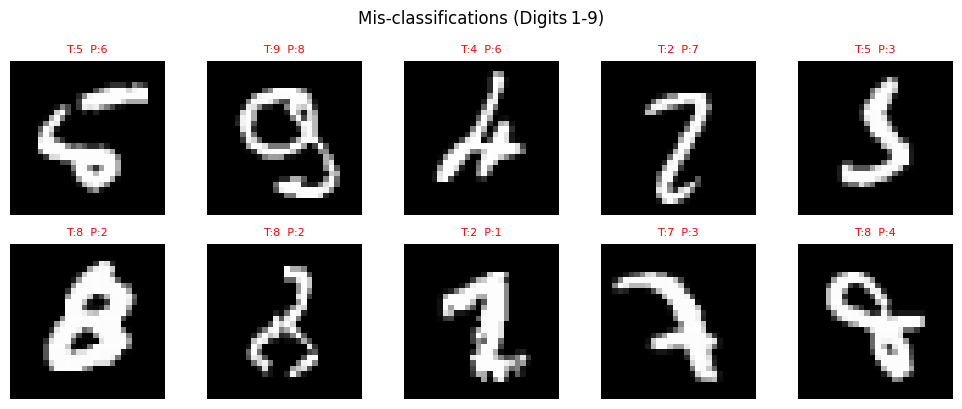

In [12]:
wrong_idx = np.where(y_pred != y_test)[0][:10]
plot_samples(wrong_idx, "Mis‑classifications (Digits 1‑9)")